<a href="https://colab.research.google.com/github/adityaahj/NBA_ANALYSIS/blob/main/nba_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
raw_data = pd.read_csv("/content/nba_data_processed.csv")
raw_data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4


In [4]:
print(raw_data.isnull().sum())
print(raw_data.dtypes)

Player    25
Pos       25
Age       25
Tm        25
G         25
GS        25
MP        25
FG        25
FGA       25
FG%       29
3P        25
3PA       25
3P%       55
2P        25
2PA       25
2P%       34
eFG%      29
FT        25
FTA       25
FT%       77
ORB       25
DRB       25
TRB       25
AST       25
STL       25
BLK       25
TOV       25
PF        25
PTS       25
dtype: int64
Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object


In [5]:
raw_data[raw_data.isnull().reset_index()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
nba_data = raw_data.dropna()
nba_data.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [7]:
nba_data['Pos'].value_counts()

Pos
SG       134
PG       114
PF       103
SF        99
C         98
PF-SF      2
SF-SG      1
SG-PG      1
Name: count, dtype: int64

In [8]:
nba_data['Pos'].replace({'SF-SG': 'SF', 'SG-PG': 'SG', 'PF-SF':'PF'}, inplace=True)
nba_data['Pos'].value_counts()

<ipython-input-8-42a106a32adc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_data['Pos'].replace({'SF-SG': 'SF', 'SG-PG': 'SG', 'PF-SF':'PF'}, inplace=True)


Pos
SG    135
PG    114
PF    105
SF    100
C      98
Name: count, dtype: int64

<ipython-input-9-c7426cfaab0b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pos', y=metric, data=position_stats, palette='viridis', ax=ax)
<ipython-input-9-c7426cfaab0b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pos', y=metric, data=position_stats, palette='viridis', ax=ax)
<ipython-input-9-c7426cfaab0b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pos', y=metric, data=position_stats, palette='viridis', ax=ax)
<ipython-input-9-c7426cfaab0b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

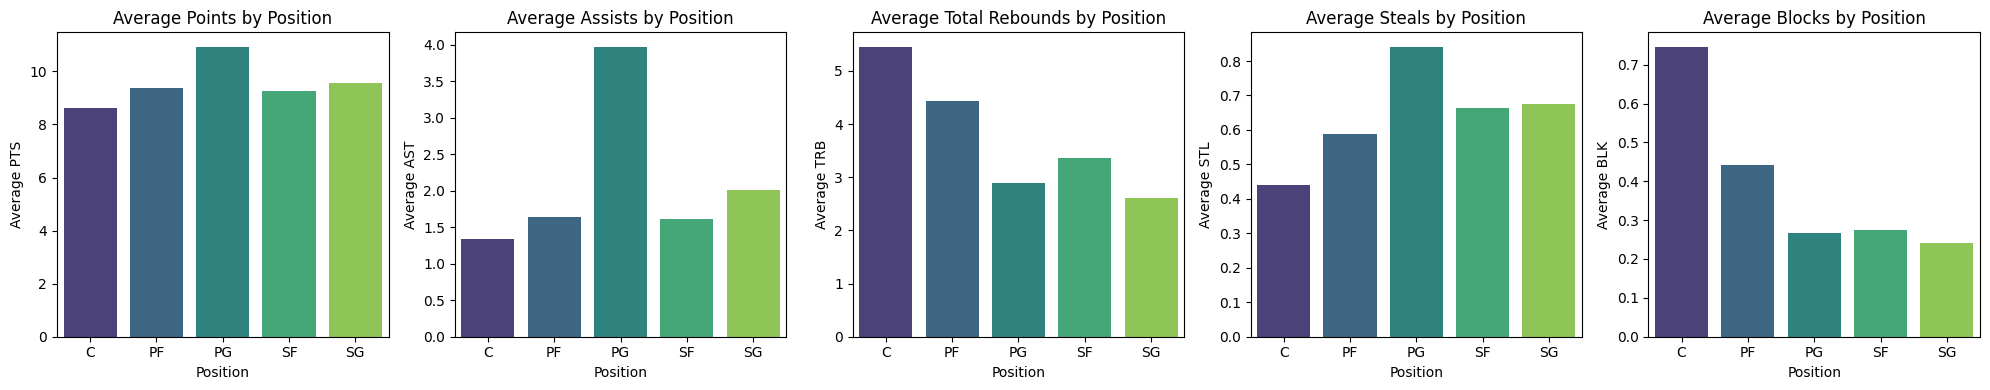

In [9]:
# Function to create bar plots for the given metric and axis
def plot_position_metric(metric,metric_name, ax):
    sns.barplot(x='Pos', y=metric, data=position_stats, palette='viridis', ax=ax)
    ax.set_title(f'Average {metric_name} by Position')
    ax.set_xlabel('Position')
    ax.set_ylabel(f'Average {metric}')


# Group the data by position and calculate the average of key performance metrics
position_stats = nba_data.groupby('Pos').agg({
    'PTS': np.mean,
    'AST': np.mean,
    'TRB': np.mean,
    'STL': np.mean,
    'BLK': np.mean
}).reset_index()

# Create bar plots for key performance metrics
metrics = ['PTS', 'AST', 'TRB', 'STL', 'BLK']
metric_name = ['Points','Assists','Total Rebounds','Steals','Blocks']

# Create a subplot grid for the bar plots
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(20, 4))



# Create bar plots for key performance metrics
for i, metric in enumerate(metrics):
    plot_position_metric(metric,metric_name[i], axes[i])

# Adjust the layout to avoid overlapping labels
plt.tight_layout()
plt.show()

The position with the highest average is PG. With following averages: 
PTS    10.927193
AST     3.973684
TRB     2.886842
STL     0.841228
BLK     0.265789
Name: PG, dtype: float64


<ipython-input-10-28dd2b87cee2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_average_position_averages.index, y=highest_average_position_averages.values, palette='viridis')


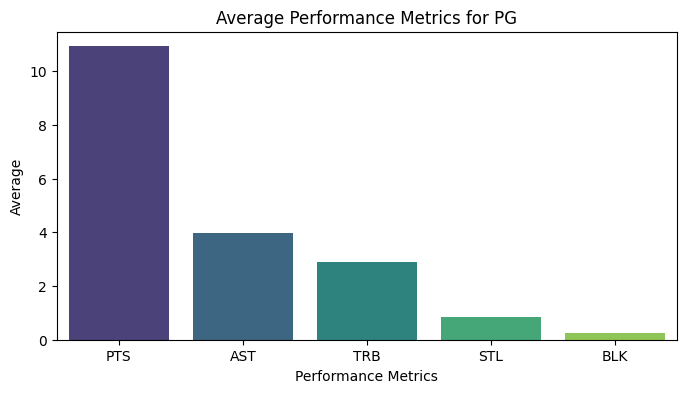

In [10]:
# Calculate the position with the highest averages

averages = nba_data.groupby("Pos")[metrics].mean()

# Find the position with the highest average
highest_average_position = averages.mean(axis=1).idxmax()

# Print the position with the highest average
print(f'The position with the highest average is {highest_average_position}. With following averages: ')


#Get the averages for the highest average position
highest_average_position_averages =  averages.loc[highest_average_position]
print(highest_average_position_averages)

# Create a bar plot for the highest average position
plt.figure(figsize=(8, 4))
sns.barplot(x=highest_average_position_averages.index, y=highest_average_position_averages.values, palette='viridis')
plt.title(f'Average Performance Metrics for {highest_average_position}')
plt.xlabel('Performance Metrics')
plt.ylabel('Average')
plt.show()

<ipython-input-11-8f5a5a1f492a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pos', y=metric, data=nba_data, palette='viridis', ax=ax)
<ipython-input-11-8f5a5a1f492a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y=metric, data=top_scorers, palette='viridis', ax=ax)
<ipython-input-11-8f5a5a1f492a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pos', y=metric, data=nba_data, palette='viridis', ax=ax)
<ipython-input-11-8f5a5a1f492a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

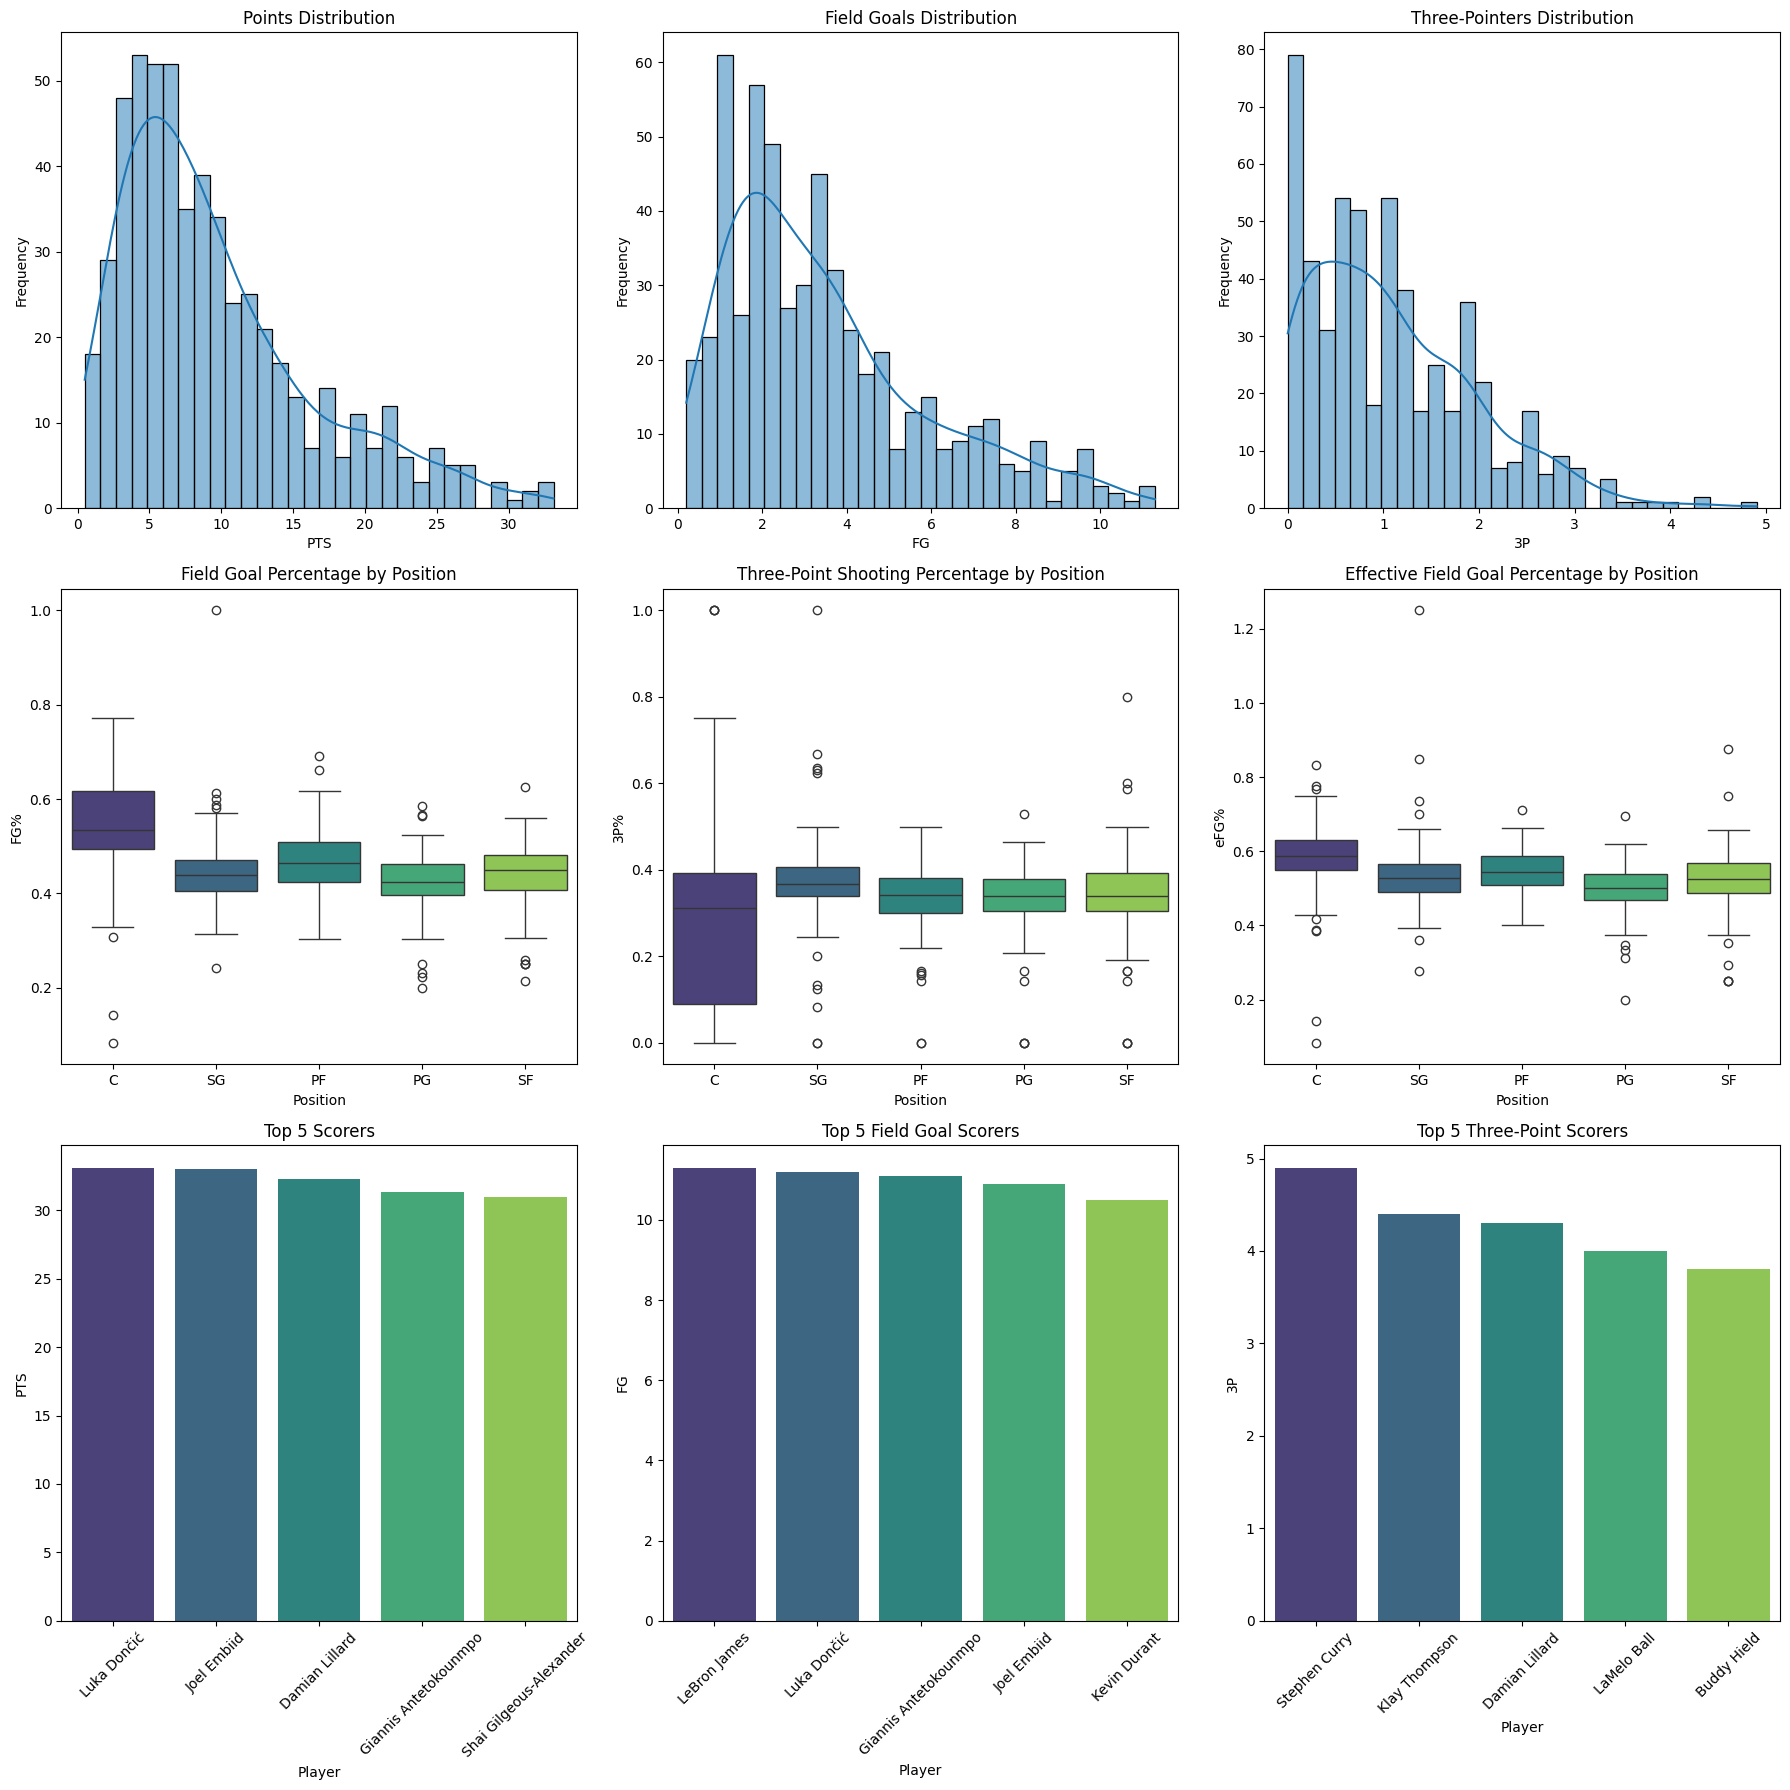

In [11]:
# Subplot grid for the plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Scoring distribution
def plot_scoring_distribution(metric, title, ax):
    sns.histplot(nba_data[metric], kde=True, bins=30, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(metric)
    ax.set_ylabel('Frequency')

#  Scoring efficiency
def plot_scoring_efficiency(metric, title, ax):
    sns.boxplot(x='Pos', y=metric, data=nba_data, palette='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Position')
    ax.set_ylabel(metric)

def plot_top_scorers(metric, title, ax):
    top_scorers = nba_data.nlargest(5, metric)
    sns.barplot(x='Player', y=metric, data=top_scorers, palette='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Player')
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(top_scorers)))  # Add this line to set the number of tick labels explicitly
    ax.set_xticklabels(top_scorers['Player'], rotation=45)

# Scoring distribution
metrics_distribution = ['PTS', 'FG', '3P']
titles_distribution = ['Points Distribution', 'Field Goals Distribution', 'Three-Pointers Distribution']

# Scoring efficiency
metrics_efficiency = ['FG%', '3P%', 'eFG%']
titles_efficiency = ['Field Goal Percentage by Position', 'Three-Point Shooting Percentage by Position', 'Effective Field Goal Percentage by Position']

# Top scorers
metrics_scorers = ['PTS', 'FG', '3P']
titles_scorers = ['Top 5 Scorers', 'Top 5 Field Goal Scorers', 'Top 5 Three-Point Scorers']

for i in range(3):
    plot_scoring_distribution(metrics_distribution[i], titles_distribution[i], axes[0, i])
    plot_scoring_efficiency(metrics_efficiency[i], titles_efficiency[i], axes[1, i])
    plot_top_scorers(metrics_scorers[i], titles_scorers[i], axes[2, i])


plt.tight_layout()
plt.show()

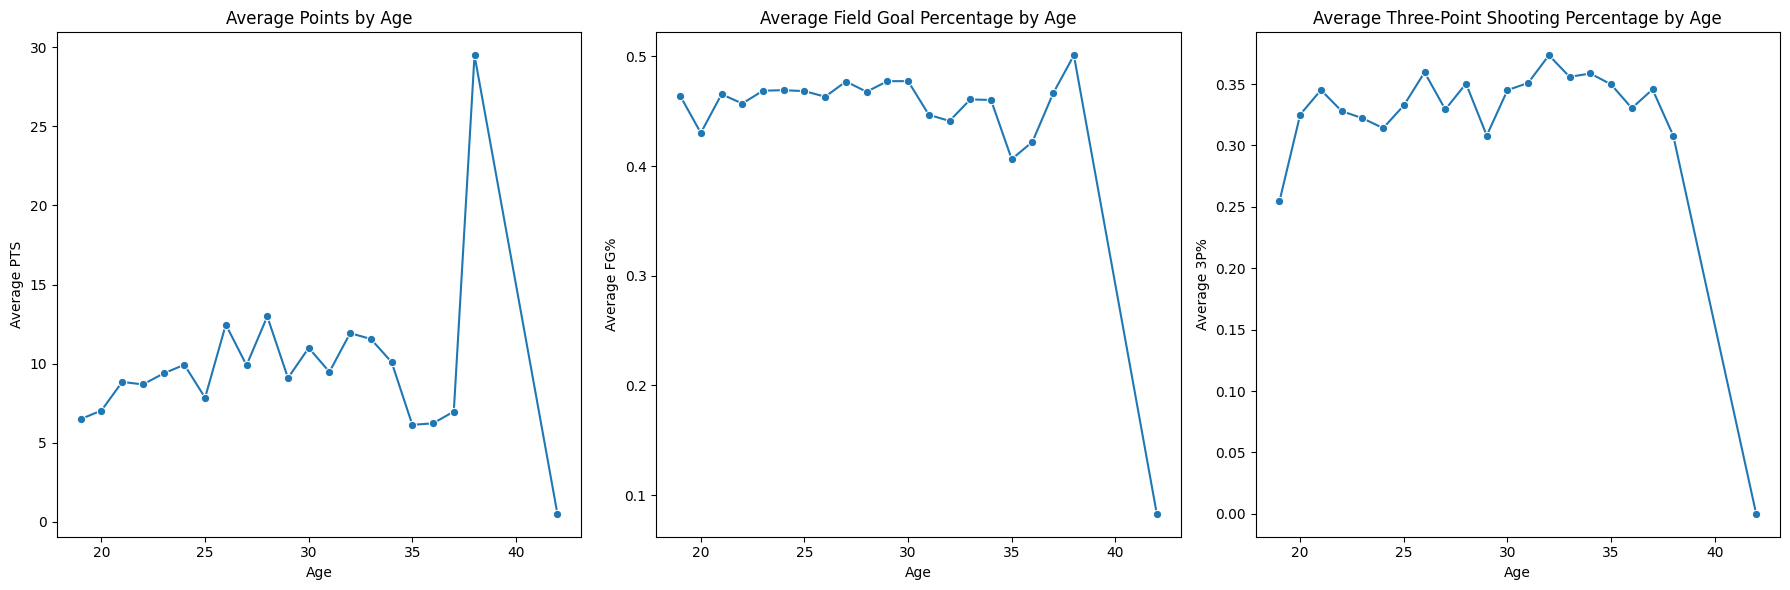

In [12]:
def plot_scoring_by_age(metric, title, ax):
    age_stats = nba_data.groupby('Age').agg({metric: np.mean}).reset_index()
    sns.lineplot(x='Age', y=metric, data=age_stats, marker='o', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Age')
    ax.set_ylabel(f'Average {metric}')

# Create a subplot grid for the plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Scoring by age metrics and titles
metrics_age = ['PTS', 'FG%', '3P%']
titles_age = ['Average Points by Age', 'Average Field Goal Percentage by Age', 'Average Three-Point Shooting Percentage by Age']

# Create the 1x3 grid of plots
for i in range(3):
    plot_scoring_by_age(metrics_age[i], titles_age[i], axes[i])

# Adjust the layout to avoid overlapping labels
plt.tight_layout()
plt.show()

In [13]:
def filter_age(data, min_age=None, max_age=None):
    if min_age is not None:
        min_age_data = data[data['Age'] <= min_age]
        return min_age_data
    if max_age is not None:
        max_age_data = data[data['Age'] >= max_age]
        return max_age_data
    if max_age is not None and min_age is not None:
        return pd.concat([min_age_data,max_age_data])


def normalize_metrics(data, metrics):
    normalized_data = data.copy()

    for metric in metrics:
        minimum = data[metric].min()
        maximum = data[metric].max()
        normalized_data[metric] = (data[metric] - minimum) / (maximum - minimum)

        normalized_data['combined_score'] = normalized_data[metrics].mean(axis=1)
    return normalized_data

def get_top_players(data,num_players=5):
    return data.nlargest(num_players, 'combined_score')

# Filter the dataset for players older than 35 and younger than 21
under_21 = filter_age(nba_data,min_age=21)
over_35 = filter_age(nba_data,max_age=35)

# Select the metrics you want to consider
selected_metrics = ['PTS', 'AST', 'TRB', 'STL', 'BLK']
columns_to_keep = selected_metrics + ['Player','Age']

under_21_metrics = under_21[columns_to_keep]
over_35_metrics = over_35[columns_to_keep]

# Normalize the selected metrics
normalized_under_21 = normalize_metrics(under_21_metrics,selected_metrics)
normalized_over_35 = normalize_metrics(over_35_metrics,selected_metrics)

# Get the top 5 oldest players who are best performing across the selected metrics
top_5_over_35 = get_top_players(normalized_over_35,num_players=5)
top_5_under_21 = get_top_players(normalized_under_21,num_players=5)

# Print the top 5 oldest players who are best performing across the selected metrics
print("Top 5 players over 35 who are best performing across multiple metrics:\n")
for i, player in top_5_over_35.iterrows():
    print(f"Age of {int(player['Age'])} {player['Player']} with a combined score of {player['combined_score']:.2f}")
print()

print("Top 5 players under 21 who are best performing across multiple metrics:\n")
for i, player in top_5_under_21.iterrows():
    print(f"Age of {int(player['Age'])} {player['Player']} with a combined score of {player['combined_score']:.2f}")

Top 5 players over 35 who are best performing across multiple metrics:

Age of 38 LeBron James with a combined score of 0.79
Age of 37 Chris Paul with a combined score of 0.66
Age of 36 Al Horford with a combined score of 0.52
Age of 36 Kyle Lowry with a combined score of 0.52
Age of 35 Mike Conley with a combined score of 0.45

Top 5 players under 21 who are best performing across multiple metrics:

Age of 21 LaMelo Ball with a combined score of 0.71
Age of 21 Anthony Edwards with a combined score of 0.70
Age of 21 Evan Mobley with a combined score of 0.60
Age of 21 Scottie Barnes with a combined score of 0.59
Age of 21 Cade Cunningham with a combined score of 0.59


In [14]:
max_age = nba_data['Age'].max()
min_age = nba_data['Age'].min()

# Display players that of oldest or the youngest age
nba_data.loc[(nba_data['Age'] == max_age) | (nba_data['Age'] == min_age),['Player','Age']].sort_values(by='Age',ascending=False)

,Player,Age
241,Udonis Haslem,42.0
32,Dominick Barlow,19.0
70,Malaki Branham,19.0
82,Kendall Brown,19.0
108,Max Christie,19.0
128,Dyson Daniels,19.0
141,Ousmane Dieng,19.0
160,Jalen Duren,19.0
216,AJ Griffin,19.0
314,Nikola Jović,19.0


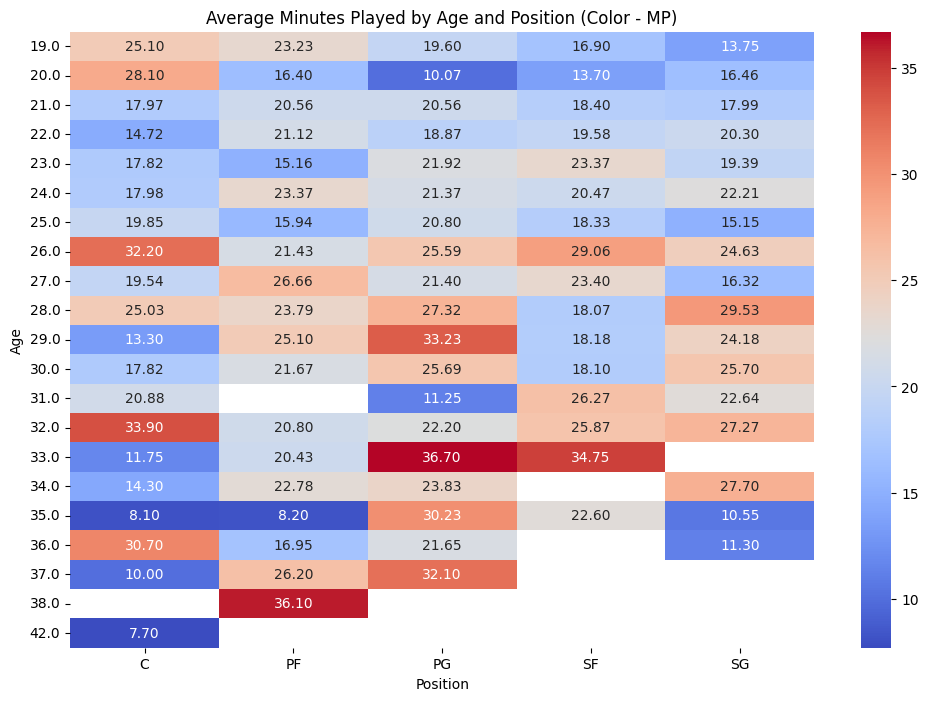

In [15]:
# Group the data by 'Age' and 'Pos' and calculate the mean 'MP' for each group
age_position_mp = nba_data.groupby(['Age', 'Pos'])['MP'].mean().reset_index()

# Pivot the grouped data to create a matrix with 'Age' as rows, 'Pos' as columns, and mean 'MP' as values
age_position_mp_matrix = age_position_mp.pivot_table(index='Age', columns='Pos', values='MP')

# Create a heatmap to visualize the average 'MP' based on 'Age' and 'Pos'
plt.figure(figsize=(12, 8))
sns.heatmap(age_position_mp_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Minutes Played by Age and Position (Color - MP)')
plt.xlabel('Position')
plt.ylabel('Age')
plt.show()

In [18]:
nba_data_copy = nba_data.copy()

# Convert the 'Age' column to numeric, forcing any errors to NaN
nba_data_copy['Age'] = pd.to_numeric(nba_data_copy['Age'], errors='coerce')

# Optionally, handle or remove rows with NaN values
nba_data_copy = nba_data_copy.dropna(subset=['Age'])

# Ensure all columns that need to be numeric are converted
# Example: Convert all columns except 'Age' to numeric (if required)
for col in nba_data_copy.columns:
    if col != 'Age':
        nba_data_copy[col] = pd.to_numeric(nba_data_copy[col], errors='coerce')

# Compute the correlation
correlation_with_age = nba_data_copy.corrwith(nba_data_copy['Age']).sort_values()

print(correlation_with_age)

2P%      -0.067264
ORB      -0.063672
FG%      -0.048984
G        -0.015888
BLK       0.000784
2PA       0.006175
2P        0.009073
eFG%      0.032024
FTA       0.042919
TRB       0.043723
3P%       0.061686
FT        0.061769
GS        0.062435
FG        0.067894
TOV       0.075872
FGA       0.077162
PF        0.080415
DRB       0.083262
PTS       0.083685
STL       0.089791
FT%       0.129701
MP        0.137946
3PA       0.155782
3P        0.166066
AST       0.195251
Age       1.000000
Player         NaN
Pos            NaN
Tm             NaN
dtype: float64


<ipython-input-19-e42161dc944d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tm', y=metric, data=sorted_data, palette='viridis', ax=ax)
<ipython-input-19-e42161dc944d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tm', y=metric, data=sorted_data, palette='viridis', ax=ax)
<ipython-input-19-e42161dc944d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tm', y=metric, data=sorted_data, palette='viridis', ax=ax)
<ipython-input-19-e42161dc944d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

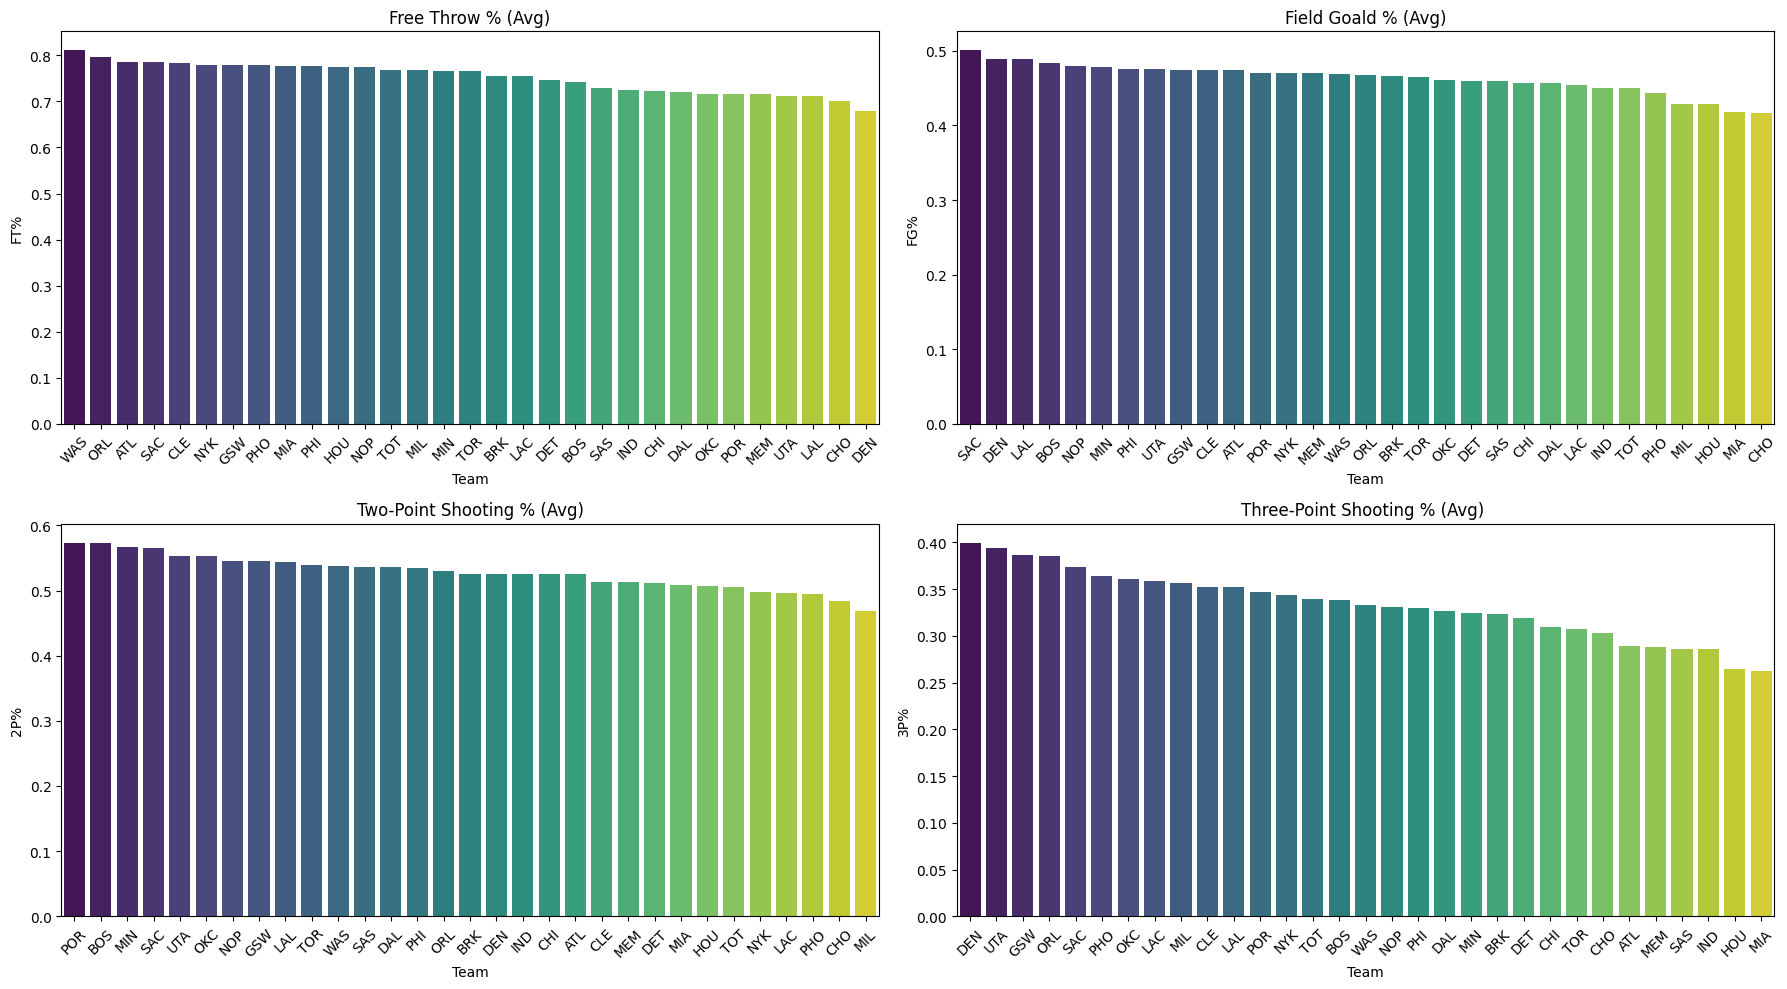

In [19]:
# Group the data by 'Tm' (team) and calculate the sum and mean of the scoring-related metrics
team_scoring_stats = nba_data.groupby('Tm').agg({'FT%': 'mean', 'FG%': 'mean', '3P%': 'mean', '2P%' : 'mean'}).reset_index()


# Define a function to plot the team scoring stats
def plot_team_scoring(metric,df, title, ax):
    #Sort values by metric
    sorted_data = df.sort_values(by=[metric], ascending=False)
    sns.barplot(x='Tm', y=metric, data=sorted_data, palette='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Team')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Metrics and titles for the plots
metrics = ['FT%', 'FG%', '2P%', '3P%']
titles = ['Free Throw % (Avg)', 'Field Goald % (Avg)', 'Two-Point Shooting % (Avg)', 'Three-Point Shooting % (Avg) ']

# Create the 2x2 grid of plots
for i in range(4):
    plot_team_scoring(metrics[i],team_scoring_stats, titles[i], axes[i//2][i%2])

# Adjust the layout to avoid overlapping labels
plt.tight_layout()
plt.show()

In [20]:
normalized_team_stats = normalize_metrics(team_scoring_stats,metrics).sort_values(by='combined_score')
normalized_team_stats.head()

,Tm,FT%,FG%,3P%,2P%,combined_score
4,CHO,0.162879,0.000000,0.300192,0.144095,0.151792
15,MIA,0.740865,0.018298,0.000000,0.377363,0.284131
10,HOU,0.715488,0.142585,0.020915,0.356846,0.308959
11,IND,0.340488,0.401669,0.171854,0.537088,0.362775
16,MIL,0.667265,0.148866,0.684634,0.000000,0.375191


In [21]:
normalized_team_stats.tail().sort_values(by='combined_score',ascending=False)

,Tm,FT%,FG%,3P%,2P%,combined_score
25,SAC,0.803283,1.000000,0.812820,0.924263,0.885091
9,GSW,0.748918,0.686557,0.904697,0.724470,0.766161
21,ORL,0.891835,0.606035,0.897491,0.585472,0.745208
1,BOS,0.481566,0.789569,0.553237,0.988703,0.703269
30,WAS,1.000000,0.623835,0.515012,0.660895,0.699935


In [23]:
print(normalized_team_stats.dtypes)

# Identify non-numeric columns
non_numeric_cols = normalized_team_stats.select_dtypes(exclude=['number']).columns

# Print non-numeric columns to understand what needs to be excluded or handled
print(f"Non-numeric columns: {non_numeric_cols}")

# Drop non-numeric columns
numeric_team_stats = normalized_team_stats.drop(columns=non_numeric_cols)

# Compute the correlation matrix with only numeric columns
correlation_matrix = numeric_team_stats.corr()

print(correlation_matrix)

Tm                 object
FT%               float64
FG%               float64
3P%               float64
2P%               float64
combined_score    float64
dtype: object
Non-numeric columns: Index(['Tm'], dtype='object')
                     FT%       FG%       3P%       2P%  combined_score
FT%             1.000000 -0.003803 -0.029448 -0.107774        0.334975
FG%            -0.003803  1.000000  0.499730  0.699507        0.850913
3P%            -0.029448  0.499730  1.000000  0.216236        0.675657
2P%            -0.107774  0.699507  0.216236  1.000000        0.696780
combined_score  0.334975  0.850913  0.675657  0.696780        1.000000


<ipython-input-19-e42161dc944d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tm', y=metric, data=sorted_data, palette='viridis', ax=ax)
<ipython-input-19-e42161dc944d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tm', y=metric, data=sorted_data, palette='viridis', ax=ax)
<ipython-input-19-e42161dc944d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tm', y=metric, data=sorted_data, palette='viridis', ax=ax)
<ipython-input-19-e42161dc944d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

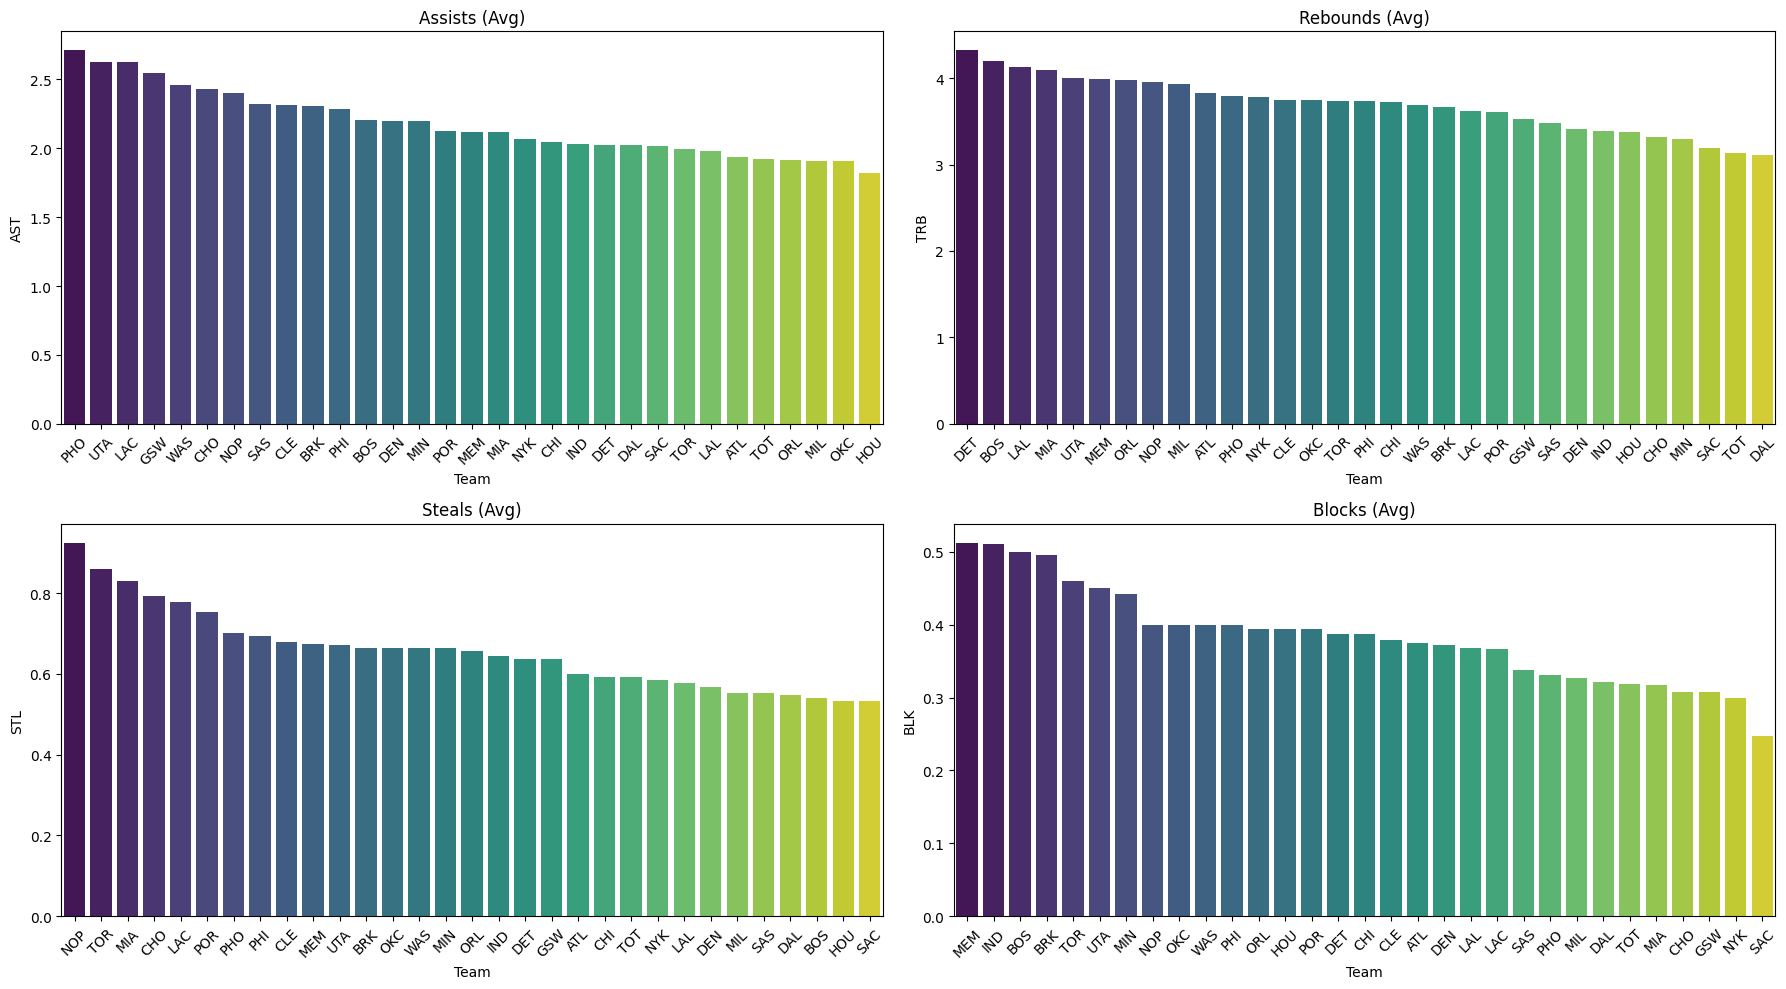

In [24]:
# Group the data by team and aggregate AST, TRB, STL, and BLK by mean
team_aux_stats = nba_data.groupby('Tm').agg({'AST': 'mean', 'TRB': 'mean', 'STL': 'mean', 'BLK': 'mean'}).reset_index()


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Metrics and titles for the plots
metrics = ['AST', 'TRB', 'STL', 'BLK']
titles = ['Assists (Avg)', 'Rebounds (Avg)', 'Steals (Avg)', 'Blocks (Avg)']

# Create the 2x2 grid of plots
for i in range(4):
    plot_team_scoring(metrics[i],team_aux_stats, titles[i], axes[i//2][i%2])

# Adjust the layout to avoid overlapping labels
plt.tight_layout()
plt.show()


In [25]:
# Worst 5 teams
normalized_aux_stats = normalize_metrics(team_aux_stats,metrics).sort_values(by='combined_score')
normalized_aux_stats.head()

,Tm,AST,TRB,STL,BLK,combined_score
25,SAC,0.214665,0.066739,0.000000,0.000000,0.070351
6,DAL,0.223335,0.000000,0.035834,0.279822,0.134748
28,TOT,0.114915,0.026623,0.150943,0.271603,0.141021
10,HOU,0.000000,0.223421,0.000000,0.555904,0.194831
16,MIL,0.099187,0.681769,0.049272,0.299621,0.282462


In [26]:
normalized_aux_stats.tail().sort_values(by='combined_score',ascending=False)

,Tm,AST,TRB,STL,BLK,combined_score
18,NOP,0.648986,0.692557,1.000000,0.576803,0.729586
29,UTA,0.905728,0.733549,0.352584,0.764890,0.689188
14,MEM,0.333073,0.728425,0.361702,1.000000,0.605800
12,LAC,0.904836,0.419274,0.624113,0.451411,0.599908
27,TOR,0.192200,0.520388,0.834043,0.802508,0.587285


In [28]:
print(normalized_aux_stats.dtypes)

# Identify non-numeric columns
non_numeric_cols = normalized_aux_stats.select_dtypes(exclude=['number']).columns

# Print non-numeric columns to understand what needs to be excluded or handled
print(f"Non-numeric columns: {non_numeric_cols}")

# Drop non-numeric columns
norm_aux_stats = normalized_aux_stats.drop(columns=non_numeric_cols)

# Compute the correlation matrix with only numeric columns
correlation_matrix = norm_aux_stats.corr()

print(correlation_matrix)

Tm                 object
AST               float64
TRB               float64
STL               float64
BLK               float64
combined_score    float64
dtype: object
Non-numeric columns: Index(['Tm'], dtype='object')
                     AST       TRB       STL       BLK  combined_score
AST             1.000000  0.034076  0.385539 -0.004401        0.585156
TRB             0.034076  1.000000  0.214213  0.316800        0.623966
STL             0.385539  0.214213  1.000000  0.162082        0.706395
BLK            -0.004401  0.316800  0.162082  1.000000        0.577129
combined_score  0.585156  0.623966  0.706395  0.577129        1.000000


**Individual's Impact on Team Performance**

In [29]:
team_stats = nba_data.groupby('Tm').agg({'PTS': 'sum', 'TRB': 'sum', 'AST': 'sum', 'STL': 'sum', 'BLK': 'sum'})



# Group the data by player and team and calculate the total points, rebounds, assists, steals, and blocks for each player on each team
player_stats = nba_data.groupby(['Player', 'Tm']).agg({'PTS': 'sum', 'TRB': 'sum', 'AST': 'sum', 'STL': 'sum', 'BLK': 'sum'})

# Calculate the player's impact score as the percentage of their team's total points, rebounds, assists, steals, and blocks that they contribute
player_stats['Impact Score'] = (player_stats['PTS'] + player_stats['TRB'] + player_stats['AST'] + player_stats['STL'] + player_stats['BLK']) / (team_stats['PTS'] + team_stats['TRB'] + team_stats['AST'] + team_stats['STL'] + team_stats['BLK'])

print("Top 10 players with the biggest impact")
# Print the top 10 players by impact score
print(player_stats['Impact Score'].nlargest(10))
print()
print("Top 10 players with the smallest impact")
# Print the top 10 players by impact score
print(player_stats['Impact Score'].nsmallest(10))

Top 10 players with the biggest impact
Player                 Tm 
Joel Embiid            PHI    0.205485
Luka Dončić            DAL    0.176570
Domantas Sabonis       SAC    0.176075
Nikola Jokić           DEN    0.173773
Stephen Curry          GSW    0.171801
Jayson Tatum           BOS    0.171073
Julius Randle          NYK    0.169796
Giannis Antetokounmpo  MIL    0.169189
De'Aaron Fox           SAC    0.167563
LaMelo Ball            CHO    0.165831
Name: Impact Score, dtype: float64

Top 10 players with the smallest impact
Player                  Tm 
Kessler Edwards         TOT    0.003325
Svi Mykhailiuk          TOT    0.003990
A.J. Lawson             TOT    0.004789
Danny Green             TOT    0.006385
Terry Taylor            TOT    0.006385
Thanasis Antetokounmpo  MIL    0.006391
Davon Reed              TOT    0.006518
Tyrese Martin           ATL    0.006889
Kessler Edwards         BRK    0.006956
Frank Kaminsky          TOT    0.007050
Name: Impact Score, dtype: float64


In [30]:
nba_data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-31-b616de01b64c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_data['Cluster'] = kmeans.labels_


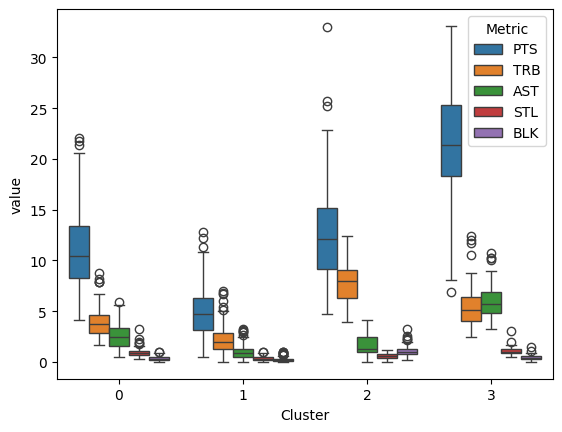

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the columns to use for clustering
cols_to_cluster = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

# Scale the selected columns
scaler = StandardScaler()
nba_data_scaled = scaler.fit_transform(nba_data[cols_to_cluster])

# Create a KMeans object with n clusters
n= 4
kmeans = KMeans(n_clusters=n)

# Fit the KMeans object to the scaled data
kmeans.fit(nba_data_scaled)

# Add the cluster labels to the original DataFrame
nba_data['Cluster'] = kmeans.labels_

# Melt the data to long format for seaborn boxplot
nba_data_melted = pd.melt(nba_data, id_vars=['Cluster'], value_vars=cols_to_cluster, var_name='Metric')

# Create a box plot of the selected metrics, grouped by cluster label
sns.boxplot(data=nba_data_melted, x='Cluster', y='value', hue='Metric')
plt.show()